https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews/code

### Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Load the Dataset

In [2]:
data = pd.read_csv('Reviews.csv',nrows=5000)

### Step 3: Explore the Data

In [3]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
data.shape

(5000, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      5000 non-null   int64 
 1   ProductId               5000 non-null   object
 2   UserId                  5000 non-null   object
 3   ProfileName             5000 non-null   object
 4   HelpfulnessNumerator    5000 non-null   int64 
 5   HelpfulnessDenominator  5000 non-null   int64 
 6   Score                   5000 non-null   int64 
 7   Time                    5000 non-null   int64 
 8   Summary                 5000 non-null   object
 9   Text                    5000 non-null   object
dtypes: int64(5), object(5)
memory usage: 390.8+ KB


In [6]:
data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,2500.500000,1.580200,2.067200,4.150400,1.294930e+09
std,1443.520003,5.584533,6.288672,1.326549,4.802063e+07
min,1.000000,0.000000,0.000000,1.000000,9.617184e+08
25%,1250.750000,0.000000,0.000000,4.000000,1.271376e+09
50%,2500.500000,0.000000,1.000000,5.000000,1.309219e+09
75%,3750.250000,2.000000,2.000000,5.000000,1.330301e+09
max,5000.000000,187.000000,216.000000,5.000000,1.351210e+09


### Step 4: Handle Missing Values

In [7]:
data.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [8]:
# drop missing values
data.dropna(inplace=True)

In [9]:
data.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

### Step 5: Handle Duplicates

In [10]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [11]:
# check duplicate values in dataset
data.duplicated().sum()

0

### Step 6: Convert Data Types

In [12]:
data["Time"] 

0       1303862400
1       1346976000
2       1219017600
3       1307923200
4       1350777600
           ...    
4995    1341273600
4996    1341100800
4997    1336694400
4998    1342137600
4999    1337990400
Name: Time, Length: 5000, dtype: int64

Converting the time data to a human-readable format (like 2011-04-27).

we can perform time-series analysis, such as identifying trends, seasonality, and patterns over time, time-based visualizations

the numeric value 1643723400 represents a timestamp in seconds(January 1, 1970, 00:00:00).

In this case, 1643723400 seconds is equivalent to:

47 years

11 months

1 day

12 hours

30 minutes
0 seconds
after the Unix epoch, which corresponds to: Tuesday, February 1, 2022, 12:30:00 PM

In [13]:
data["Time"] = pd.to_datetime(data["Time"], unit="s")

In [14]:
data["Time"]

0      2011-04-27
1      2012-09-07
2      2008-08-18
3      2011-06-13
4      2012-10-21
          ...    
4995   2012-07-03
4996   2012-07-01
4997   2012-05-11
4998   2012-07-13
4999   2012-05-26
Name: Time, Length: 5000, dtype: datetime64[ns]

### Step 7: Feature Engineering

measures how helpful a review is perceived by other users. 

A higher ratio indicates more helpful reviews.

Helps identify which reviews provide the most value to users

In [15]:
# create new features HelpfulnessRatio

data['HelpfulnessRatio'] = data['HelpfulnessNumerator'] / data['HelpfulnessDenominator']

In [16]:
data['HelpfulnessRatio']

0       1.0
1       NaN
2       1.0
3       1.0
4       NaN
       ... 
4995    1.0
4996    1.0
4997    1.0
4998    NaN
4999    NaN
Name: HelpfulnessRatio, Length: 5000, dtype: float64

The number of words or characters in the review text.

Longer reviews provide more detailed opinions, which can correlate with the review score.

In [17]:
data['ReviewLength'] = data['Text'].apply(lambda x: len(x.split()))

In [18]:
data['ReviewLength']

0        48
1        31
2        94
3        41
4        27
       ... 
4995    105
4996    121
4997    105
4998    120
4999    139
Name: ReviewLength, Length: 5000, dtype: int64

The number of words in the review summary. 

Summaries with more words might be more descriptive and could correlate with the review score

In [19]:
data['SummaryWordCount'] = data['Summary'].apply(lambda x: len(x.split()))

In [20]:
data['SummaryWordCount']

0        4
1        3
2        4
3        2
4        2
        ..
4995     6
4996    11
4997     7
4998     8
4999     3
Name: SummaryWordCount, Length: 5000, dtype: int64

The sentiment polarity of the review text (positive, negative, neutral). 

In [21]:
from textblob import TextBlob

data['SentimentScore'] = data['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [22]:
data['SentimentScore']

0       0.450000
1      -0.033333
2       0.133571
3       0.166667
4       0.483333
          ...   
4995   -0.083333
4996    0.302273
4997    0.354615
4998    0.345417
4999    0.189796
Name: SentimentScore, Length: 5000, dtype: float64

The age of the review from the time it was written to the present date.

Older reviews may be less relevant than newer ones.

In [23]:
data['ReviewAge'] = (pd.Timestamp.now() - data['Time']).dt.days

In [24]:
data['ReviewAge']

0       4845
1       4346
2       5827
3       4798
4       4302
        ... 
4995    4412
4996    4414
4997    4465
4998    4402
4999    4450
Name: ReviewAge, Length: 5000, dtype: int64

The day of the week the review was written.

Some days might have more reviews or higher/lower scores due to specific patterns.

In [25]:
data['DayOfWeek'] = data['Time'].dt.dayofweek

In [26]:
data['DayOfWeek']

0       2
1       4
2       0
3       0
4       6
       ..
4995    1
4996    6
4997    4
4998    4
4999    5
Name: DayOfWeek, Length: 5000, dtype: int32

month in which the review was written.

trends can be detected, which may influence review patterns

In [27]:
data['Month'] = data['Time'].dt.month

In [28]:
data['Month']

0        4
1        9
2        8
3        6
4       10
        ..
4995     7
4996     7
4997     5
4998     7
4999     5
Name: Month, Length: 5000, dtype: int32

In [29]:
data['HelpfulnessRatio'].head()

0    1.0
1    NaN
2    1.0
3    1.0
4    NaN
Name: HelpfulnessRatio, dtype: float64

In [30]:
data['HelpfulnessRatio'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: HelpfulnessRatio
Non-Null Count  Dtype  
--------------  -----  
2642 non-null   float64
dtypes: float64(1)
memory usage: 39.2 KB


In [31]:
data['HelpfulnessRatio'].isnull().sum()

2358

In [32]:
# Replace NaN with 0

data['HelpfulnessRatio'].fillna(0, inplace=True)

In [33]:
data.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio,ReviewLength,SummaryWordCount,SentimentScore,ReviewAge,DayOfWeek,Month
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,48,4,0.450000,4845,2,4
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0,31,3,-0.033333,4346,4,9


### Step 8: Text Preprocessing

In [34]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [35]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
# create a function to Clean the text data in the Summary and Text columns

stop_words = set(stopwords.words('english'))

def preprocessing_text(text):

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # perform word tokenization     
    words = word_tokenize(text)

    # Remove stop words
    words = [word for word in words if word not in stop_words]

    return ' '.join(words)

data['CleanedSummary'] = data['Summary'].apply(preprocessing_text)
data['CleanedText'] = data['Text'].apply(preprocessing_text)

In [37]:
data['CleanedSummary']

0               good quality dog food
1                          advertised
2                        delight says
3                      cough medicine
4                         great taffy
                    ...              
4995             cavemen must wealthy
4996      cookies need work make home
4997                 okay pinch great
4998    good except rainforest flavor
4999              great healthy snack
Name: CleanedSummary, Length: 5000, dtype: object

In [38]:
data['CleanedText']

0       bought several vitality canned dog food produc...
1       product arrived labeled jumbo salted peanutsth...
2       confection around centuries light pillowy citr...
3       looking secret ingredient robitussin believe f...
4       great taffy great price wide assortment yummy ...
                              ...                        
4995    really wanted like thesebr br first cookies si...
4996    impressed cookies tried first came company one...
4997    cookies came sealed seem high quality ingredie...
4998    taste good arent like best things ever either ...
4999    love cookies paleo diet right cookies look for...
Name: CleanedText, Length: 5000, dtype: object

### Step 9: Encode Categorical Variables

Convert categorical variables to numerical values

Label Encoding 

Use this if categories has a large number of unique values. 

It assigns a unique integer to each category, which can be useful but might introduce an ordinal relationship that doesn't exist.

Suitable when the categorical variable is ordinal or when you have a large number of categories.

Example: Customer IDs, user names, etc

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
le = LabelEncoder()

data['ProfileName'] = le.fit_transform(data['ProfileName'])

In [41]:
data['ProfileName']

0       4182
1       4193
2       2829
3       2047
4       2650
        ... 
4995     603
4996    3165
4997    1491
4998    4427
4999    3493
Name: ProfileName, Length: 5000, dtype: int32

TF-IDF Vectorizer
This captures the importance of words in the documents relative to the entire corpus. 

It is useful when you want to understand the relevance of words.

Better for capturing the importance and relevance of words in text data.

Example: Analyzing review texts, sentiment analysis, etc

In [42]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the Summary column
tfidf_summary = tfidf_vectorizer.fit_transform(data['CleanedSummary'])
tfidf_summary_df = pd.DataFrame(tfidf_summary.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
df = pd.concat([data, tfidf_summary_df], axis=1)

In [43]:
df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,...,yummmmmmmmmm,yummmmy,yummmyyyy,yummy,yummywonderful,yumo,yumyum,zero,zesty,zippy
0,1,B001E4KFG0,A3SGXH7AUHU8GW,4182,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,4193,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# Fit and transform the Text column
tfidf_text = tfidf_vectorizer.fit_transform(data['CleanedText'])
tfidf_text_df = pd.DataFrame(tfidf_text.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
df = pd.concat([data, tfidf_text_df], axis=1)

In [45]:
df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,...,zap,zealand,zero,zest,zinc,zing,zip,ziplock,zoo,zucchini
0,1,B001E4KFG0,A3SGXH7AUHU8GW,4182,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,4193,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
# Drop the original columns
df.drop(columns=['Summary', 'Text', 'CleanedSummary', 'CleanedText'], inplace=True)

In [47]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,HelpfulnessRatio,ReviewLength,...,zap,zealand,zero,zest,zinc,zing,zip,ziplock,zoo,zucchini
0,1,B001E4KFG0,A3SGXH7AUHU8GW,4182,1,1,5,2011-04-27,1.0,48,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,4193,0,0,1,2012-09-07,0.0,31,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,2829,1,1,4,2008-08-18,1.0,94,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,2047,3,3,2,2011-06-13,1.0,41,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,2650,0,0,5,2012-10-21,0.0,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Step 10: Outlier Detection and Handling

Identify and handle outliers in numerical columns

Detect outliers using methods such as the Interquartile Range (IQR)

HelpfulnessNumerator: The number of people who found a review helpful.

HelpfulnessDenominator: The total number of people who voted on the helpfulness of a review (both helpful and unhelpful votes).

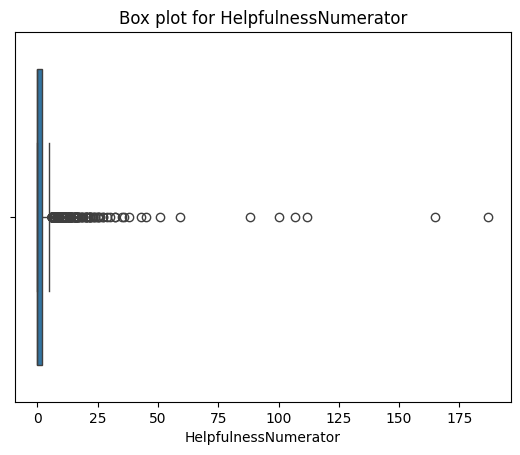

In [48]:
# Box plot for HelpfulnessNumerator
sns.boxplot(x=df['HelpfulnessNumerator'])
plt.title('Box plot for HelpfulnessNumerator')
plt.show()

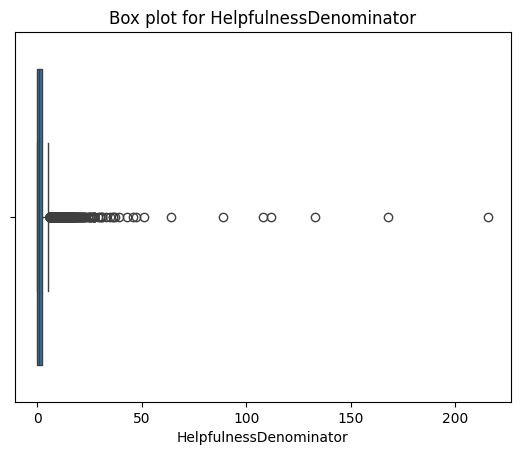

In [49]:
# Box plot for HelpfulnessDenominator
sns.boxplot(x=df['HelpfulnessDenominator'])
plt.title('Box plot for HelpfulnessDenominator')
plt.show()

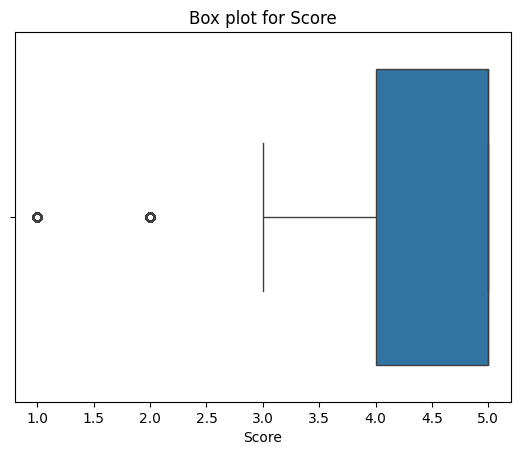

In [50]:
# Box plot for Score
sns.boxplot(x=df['Score'])
plt.title('Box plot for Score')
plt.show()

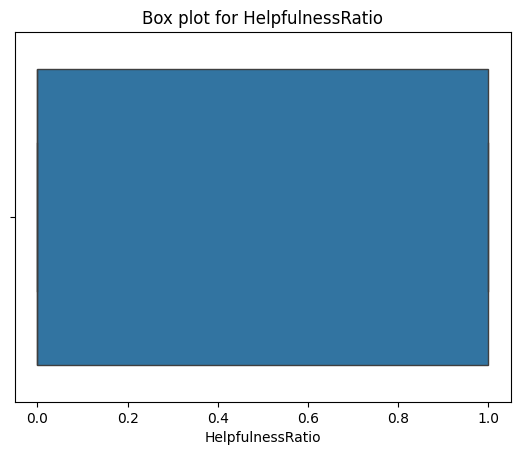

In [51]:
# Box plot for HelpfulnessRatio
sns.boxplot(x=df['HelpfulnessRatio'])
plt.title('Box plot for HelpfulnessRatio')
plt.show()

Apply IQR Method on HelpfulnessNumerator

In [52]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for HelpfulnessNumerator
Q1_num = df['HelpfulnessNumerator'].quantile(0.25)
Q3_num = df['HelpfulnessNumerator'].quantile(0.75)

# Calculate IQR for HelpfulnessNumerator
IQR_num = Q3_num - Q1_num

# Define lower and upper bound for HelpfulnessNumerator
lower_bound_num = Q1_num - 1.5 * IQR_num
upper_bound_num = Q3_num + 1.5 * IQR_num

# Identify outliers for HelpfulnessNumerator
outliers_num = df[(df['HelpfulnessNumerator'] < lower_bound_num) | (df['HelpfulnessNumerator'] > upper_bound_num)]

#  remove outliers for HelpfulnessNumerator
df_cleaned_num = df[~((df['HelpfulnessNumerator'] < lower_bound_num) | (df['HelpfulnessNumerator'] > upper_bound_num))]

print(f"Number of outliers in HelpfulnessNumerator: {len(outliers_num)}")


Number of outliers in HelpfulnessNumerator: 304


Apply IQR Method on HelpfulnessDenominator

In [53]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for HelpfulnessDenominator
Q1_denom = df['HelpfulnessDenominator'].quantile(0.25)
Q3_denom = df['HelpfulnessDenominator'].quantile(0.75)

# Calculate IQR for HelpfulnessDenominator
IQR_denom = Q3_denom - Q1_denom

# Define lower and upper bound for HelpfulnessDenominator
lower_bound_denom = Q1_denom - 1.5 * IQR_denom
upper_bound_denom = Q3_denom + 1.5 * IQR_denom

# Identify outliers for HelpfulnessDenominator
outliers_denom = df[(df['HelpfulnessDenominator'] < lower_bound_denom) | (df['HelpfulnessDenominator'] > upper_bound_denom)]

# Optionally, remove outliers for HelpfulnessDenominator
df_cleaned_denom = df[~((df['HelpfulnessDenominator'] < lower_bound_denom) | (df['HelpfulnessDenominator'] > upper_bound_denom))]

print(f"Number of outliers in HelpfulnessDenominator: {len(outliers_denom)}")


Number of outliers in HelpfulnessDenominator: 449


### Step 11: Data Scaling

Scale the numerical features to ensure they have a similar range.

In [54]:
scaler = StandardScaler()
df[['HelpfulnessNumerator', 'HelpfulnessDenominator', 'HelpfulnessRatio']] = scaler.fit_transform(df[['HelpfulnessNumerator', 'HelpfulnessDenominator', 'HelpfulnessRatio']])

In [55]:
df[['HelpfulnessNumerator', 'HelpfulnessDenominator', 'HelpfulnessRatio']]

,HelpfulnessNumerator,HelpfulnessDenominator,HelpfulnessRatio
0,-0.103904,-0.169719,1.304695
1,-0.282988,-0.328751,-0.867873
2,-0.103904,-0.169719,1.304695
3,0.254263,0.148345,1.304695
4,-0.282988,-0.328751,-0.867873
...,...,...,...
4995,-0.103904,-0.169719,1.304695
4996,-0.103904,-0.169719,1.304695
4997,-0.103904,-0.169719,1.304695
4998,-0.282988,-0.328751,-0.867873


### Step 12: Dimensionality Reduction


In [56]:
# pca = PCA(n_components=10)  # Adjust n_components as needed
# pca_features = pca.fit_transform(df.drop(columns=['Id', 'ProductId', 'UserId', 'Summary', 'Text', 'CleanedSummary', 'CleanedText']))
# df_pca = pd.DataFrame(pca_features, columns=[f'PC{i+1}' for i in range(pca_features.shape[1])])

In [57]:
# df_pca

### Step 13: Data Visualization

understand the distribution of numerical features.

dentify skewness in data.

Determine if transformations are needed.

Understand the central tendency and variability

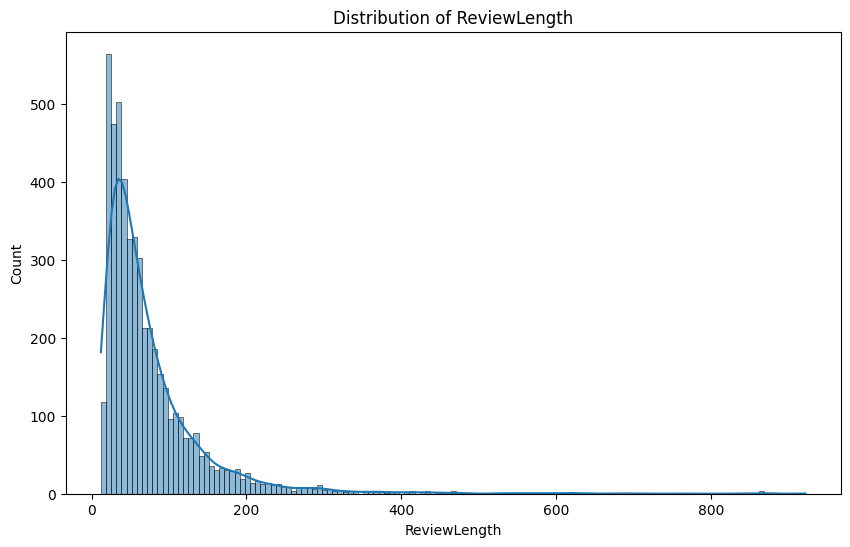

In [58]:
# Distribution of ReviewLength
plt.figure(figsize=(10, 6))
sns.histplot(df['ReviewLength'], kde=True)
plt.title('Distribution of ReviewLength')
plt.show()

#### Insights

The peak of the histogram (around 200-300) indicates the typical length of reviews.

count represents the number of reviews

The spread of the histogram shows the variability in review lengths. Reviews can be as short as 10-20 words or as long as 1000-1500 words.

The histogram is slightly right-skewed, indicating that there are more longer reviews than shorter ones.

The histogram may show some outliers on the right side 

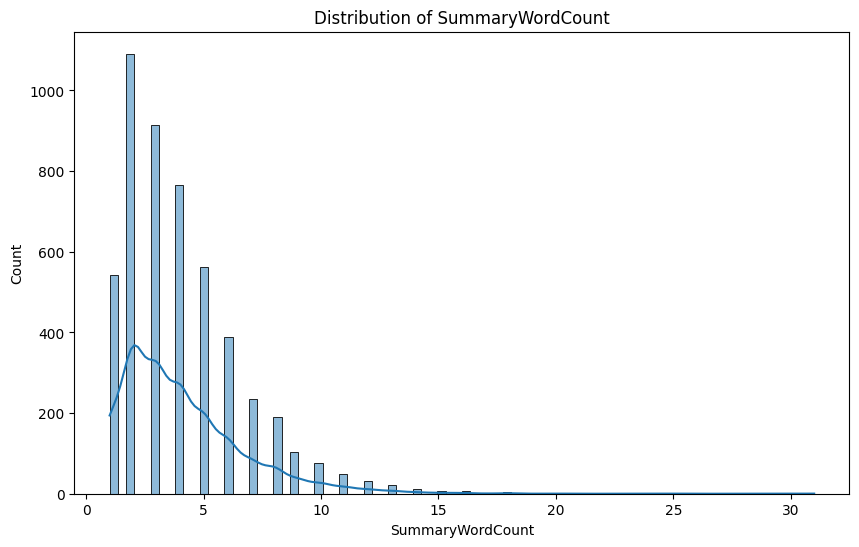

In [59]:
# Distribution of SummaryWordCount
plt.figure(figsize=(10, 6))
sns.histplot(df['SummaryWordCount'], kde=True)
plt.title('Distribution of SummaryWordCount')
plt.show()

#### Insights

The histogram shows the spread of summary word counts, indicating how much they vary.

The peak of the histogram (if present) indicates the typical length of summaries.



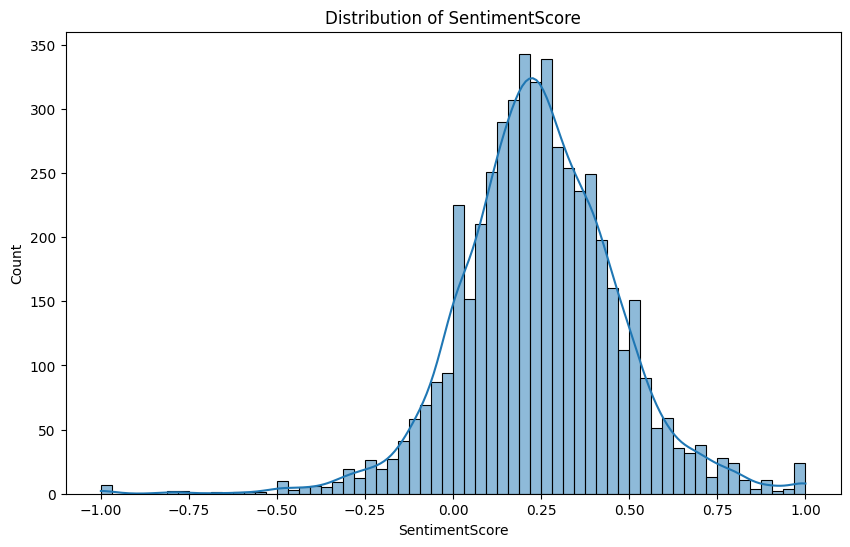

In [60]:
# Distribution of SentimentScore
plt.figure(figsize=(10, 6))
sns.histplot(df['SentimentScore'], kde=True)
plt.title('Distribution of SentimentScore')
plt.show()

#### Insights

The x-axis shows the range of sentiment scores, typically between -1 (very negative) and 1 (very positive).

The histogram shows whether sentiment scores are Skewed towards positive or negative values

The highest peak(s) indicate the most common sentiment score(s).

A peak around 0 indicates a neutral sentiment

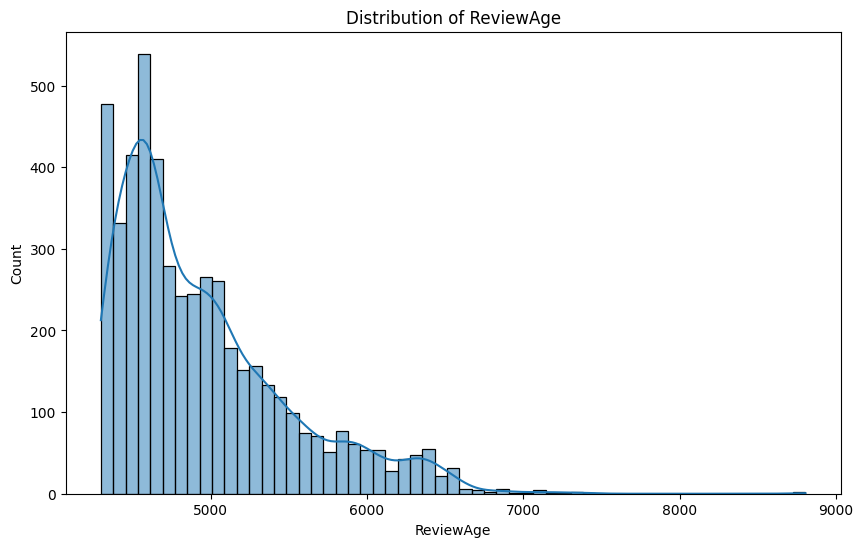

In [61]:
# Distribution of ReviewAge
plt.figure(figsize=(10, 6))
sns.histplot(df['ReviewAge'], kde=True)
plt.title('Distribution of ReviewAge')
plt.show()

#### Insights

 The x-axis shows the range of review ages, typically in days, weeks, or months. or how old review is from date of writen to now?

The histogram shows whether review ages are Skewed towards newer or older reviews

The highest peak(s) indicate the most common review age(s).

visualize categorical data

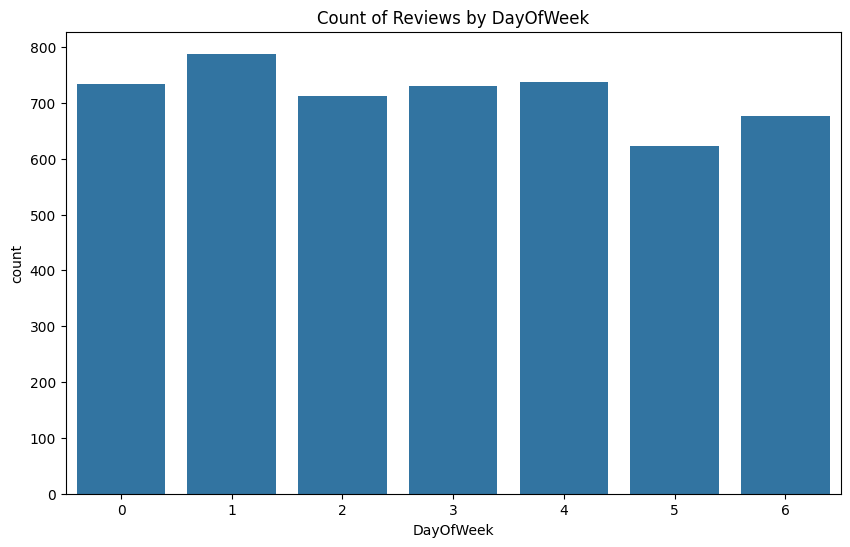

In [62]:
# Bar plot for DayOfWeek
plt.figure(figsize=(10, 6))
sns.countplot(x=df['DayOfWeek'])
plt.title('Count of Reviews by DayOfWeek')
plt.show()

#### Insights

The x-axis shows the days of the week (Monday to Sunday), and the y-axis shows the count of reviews.

The highest bars indicate the days with the most reviews.

The lowest bars indicate the days with the fewest reviews

we can identify patterns, such as More reviews on weekdays (Monday to Friday) and fewer on weekends (Saturday and Sunday)



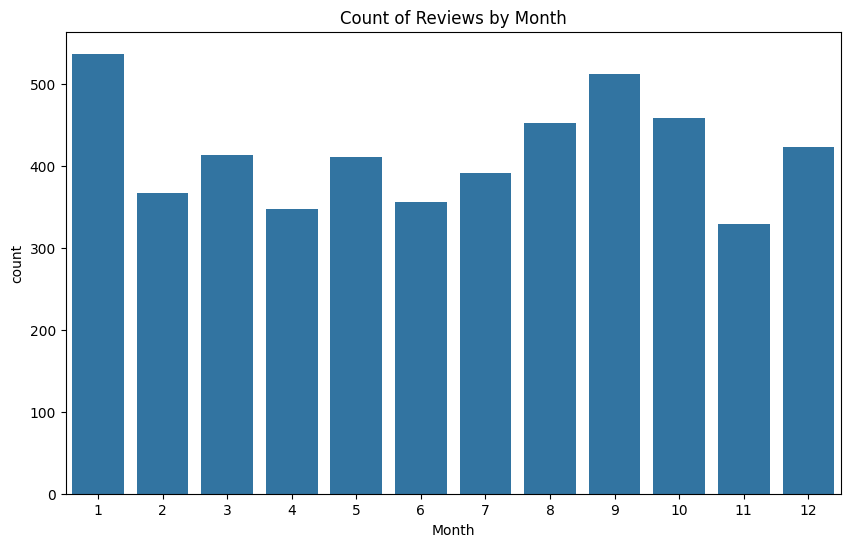

In [63]:
# Bar plot for Month
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Month'])
plt.title('Count of Reviews by Month')
plt.show()

visualize relationships between two numerical features.

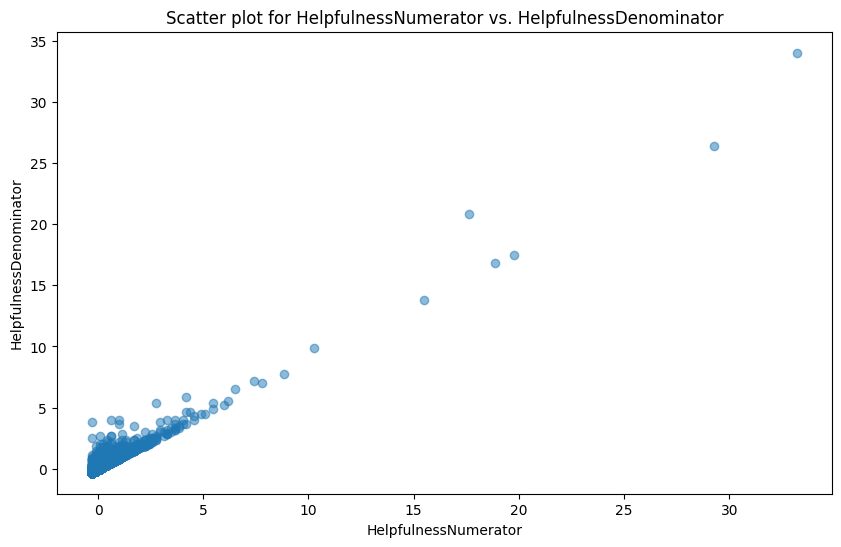

In [64]:
# Scatter plot for HelpfulnessNumerator vs. HelpfulnessDenominator
plt.figure(figsize=(10, 6))
plt.scatter(df['HelpfulnessNumerator'], df['HelpfulnessDenominator'], alpha=0.5)
plt.xlabel('HelpfulnessNumerator')
plt.ylabel('HelpfulnessDenominator')
plt.title('Scatter plot for HelpfulnessNumerator vs. HelpfulnessDenominator')
plt.show()

### Insights

The scatter plot shows the correlation between the two variables. If the points are clustered around a straight line, it indicates a strong correlation.

HelpfulnessNumerator is typically the number of users who found a review helpful, while HelpfulnessDenominator is the total number of users who voted on the review

Reviews with high helpfulness ratios (points in the top-left quadrant)

Reviews with low helpfulness ratios (points in the bottom-right quadrant)

(Outliers)Points far away from the majority may indicate unusual reviews

Very helpful reviews (high numerator, low denominator)

Very unhelpful reviews (low numerator, high denominator)

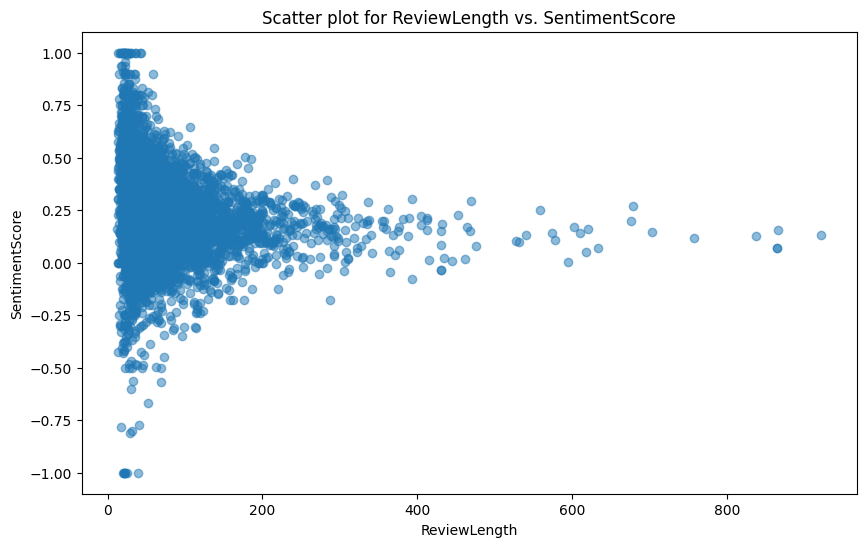

In [65]:
# Scatter plot for ReviewLength vs. SentimentScore
plt.figure(figsize=(10, 6))
plt.scatter(df['ReviewLength'], df['SentimentScore'], alpha=0.5)
plt.xlabel('ReviewLength')
plt.ylabel('SentimentScore')
plt.title('Scatter plot for ReviewLength vs. SentimentScore')
plt.show()

### Insights

The scatter plot shows the correlation between review length and sentiment score. If the points are clustered around a straight line, it indicates a strong correlation.

Longer reviews with high sentiment scores (points in the top-right quadrant)

Shorter reviews with low sentiment scores (points in the bottom-left quadrant)

Reviews with neutral sentiment scores (points around the middle horizontal line)

### Outliers: 

Very long reviews with low sentiment scores

Very short reviews with high sentiment scores

visualize correlations between multiple features.

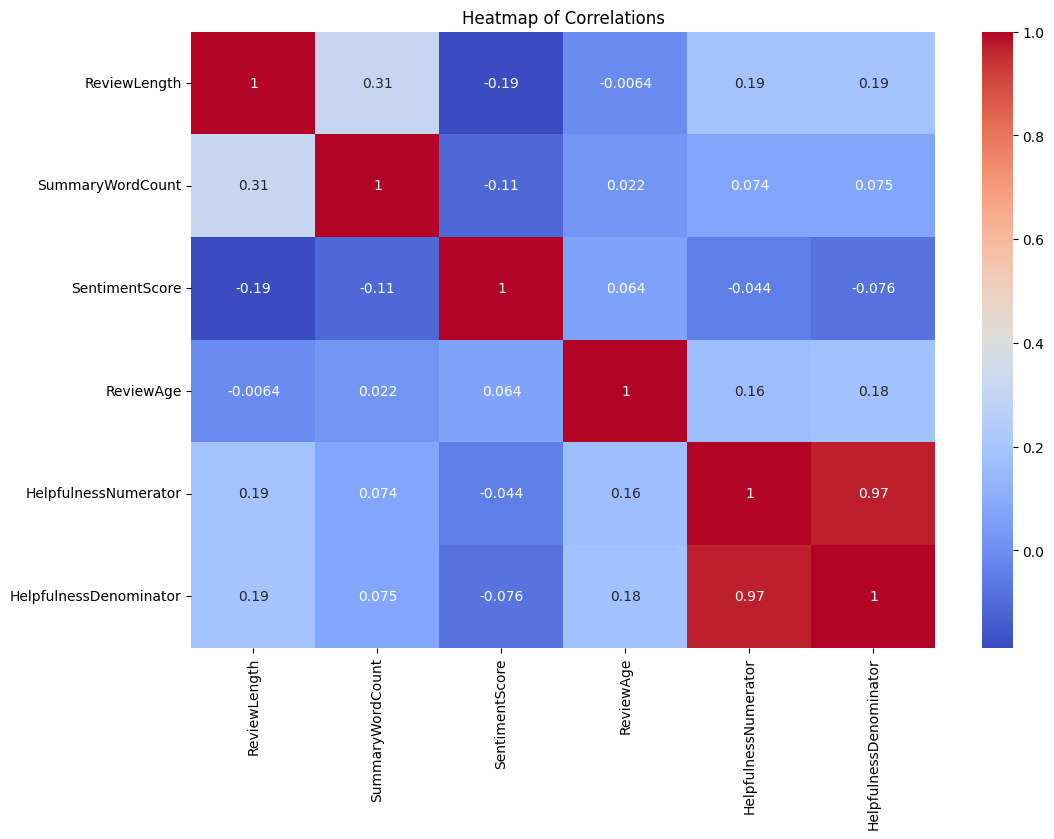

In [66]:
# Heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df[['ReviewLength', 'SummaryWordCount', 'SentimentScore', 'ReviewAge', 'HelpfulnessNumerator', 'HelpfulnessDenominator']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations')
plt.show()

### Insights

The heatmap displays the correlation coefficients between each pair of columns, ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation).

Darker colors indicate stronger correlations, either positive (red) or negative (blue).

Lighter colors indicate weaker correlations.

ReviewLength and SummaryWordCount are strongly positively correlated, indicating that longer reviews tend to have longer summaries.

HelpfulnessNumerator and HelpfulnessDenominator are strongly positively correlated, indicating that reviews with more helpful votes tend to have more total votes.

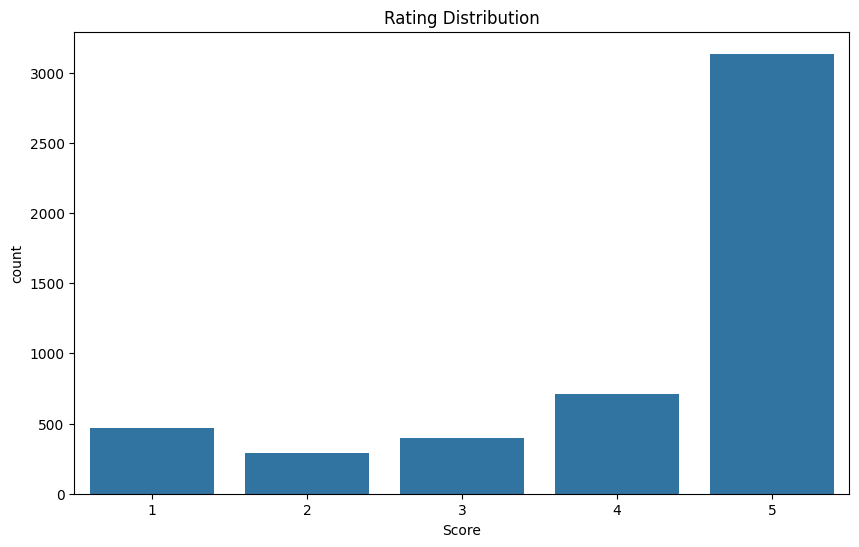

In [67]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Score', data=df)
plt.title('Rating Distribution')
plt.show()

### Insights

shows the frequency(count) of each rating (Score) value, indicating how many reviews have each rating.


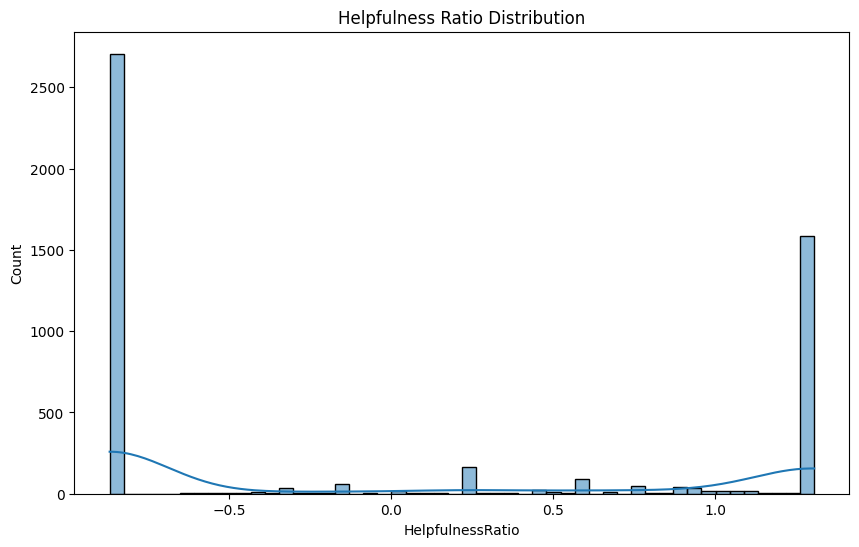

In [68]:
plt.figure(figsize=(10, 6))
sns.histplot(df['HelpfulnessRatio'], bins=50, kde=True)
plt.title('Helpfulness Ratio Distribution')
plt.show()

### Insights

The x-axis shows the range of HelpfulnessRatio values, typically between 0 (not helpful at all) and 1 (very helpful).

The highest peak indicates the most common HelpfulnessRatio value.

KDE (Kernel Density Estimate) curve:
The smooth curve estimates the underlying distribution of HelpfulnessRatio values, helping to identify:
Modes (peaks)
Tails (outliers)




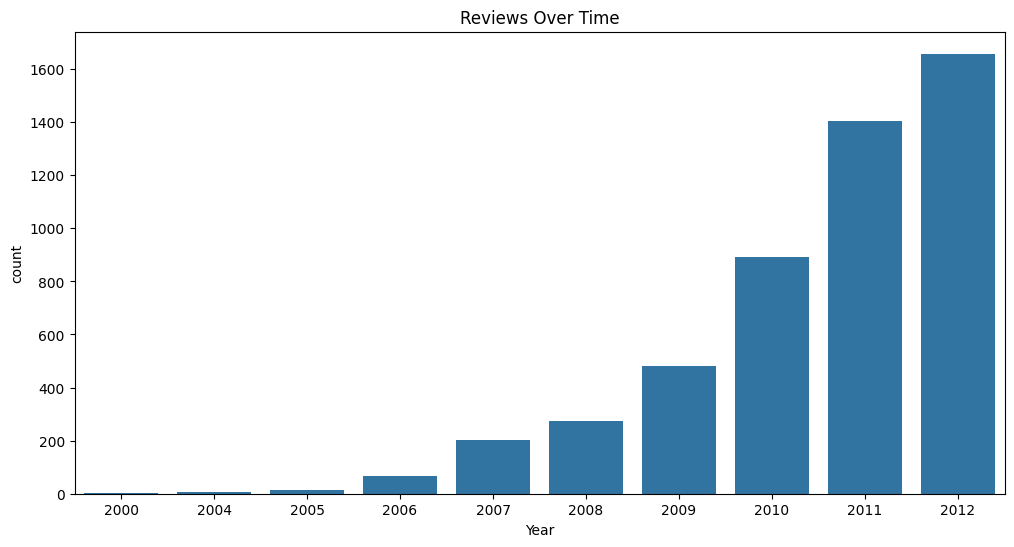

In [69]:
plt.figure(figsize=(12, 6))
df['Year'] = df['Time'].dt.year
sns.countplot(x='Year', data=df)
plt.title('Reviews Over Time')
plt.show()


### Insights

shows the number of reviews for each year

Increasing or decreasing trends in review volume

Years with exceptionally high or low review volume
